In [2]:
# Necssary libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.basemap import Basemap
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random

# Binomial Distribution

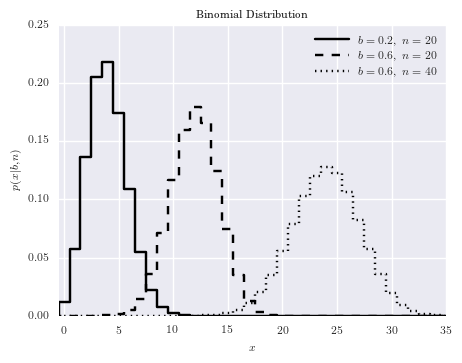

In [4]:
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Define the distribution parameters to be plotted
n_values = [20, 20, 40]
b_values = [0.2, 0.6, 0.6]
linestyles = ['-', '--', ':']
x = np.arange(-1, 200)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for (n, b, ls) in zip(n_values, b_values, linestyles):
    # create a binomial distribution
    dist = binom(n, b)

    plt.plot(x, dist.pmf(x), ls=ls, c='black',
             label=r'$b=%.1f,\ n=%i$' % (b, n), linestyle='steps-mid')

plt.xlim(-0.5, 35)
plt.ylim(0, 0.25)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|b, n)$')
plt.title('Binomial Distribution')

plt.legend()
plt.show()


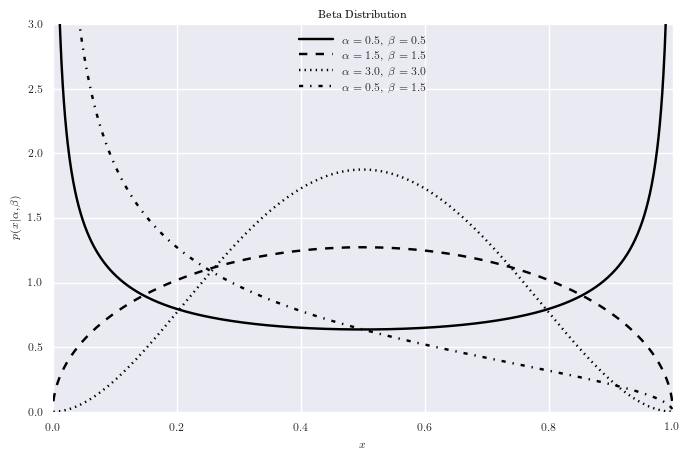

In [13]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import beta
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Define the distribution parameters to be plotted
alpha_values = [0.5, 1.5, 3.0, 0.5]
beta_values = [0.5, 1.5, 3.0, 1.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(0, 1, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(8, 5))

for a, b, ls in zip(alpha_values, beta_values, linestyles):
    dist = beta(a, b)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 1)
plt.ylim(0, 3)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title('Beta Distribution')

plt.legend(loc=0)
plt.show()

In [44]:

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(79 * '_')

n_digits: 10, 	 n_samples 1797, 	 n_features 64
_______________________________________________________________________________
init    time  inertia    homo   compl  v-meas     ARI AMI  silhouette
k-means++   0.15s    69432   0.602   0.650   0.625   0.465   0.598    0.146
   random   0.14s    69694   0.669   0.710   0.689   0.553   0.666    0.147
PCA-based   0.02s    70804   0.671   0.698   0.684   0.561   0.668    0.118
_______________________________________________________________________________


In [125]:
list(kmeans.labels_)

[9,
 0,
 9,
 7,
 3,
 7,
 1,
 6,
 7,
 0,
 3,
 4,
 7,
 8,
 3,
 8,
 1,
 4,
 6,
 7,
 9,
 4,
 7,
 6,
 3,
 0,
 1,
 5,
 0,
 7,
 9,
 7,
 8,
 8,
 1,
 8,
 9,
 7,
 6,
 7,
 0,
 3,
 4,
 4,
 6,
 7,
 0,
 4,
 1,
 1,
 0,
 4,
 5,
 0,
 4,
 9,
 4,
 4,
 1,
 8,
 8,
 4,
 8,
 8,
 3,
 1,
 1,
 1,
 9,
 8,
 4,
 8,
 9,
 7,
 7,
 4,
 8,
 4,
 1,
 1,
 4,
 6,
 1,
 8,
 2,
 4,
 4,
 4,
 1,
 8,
 4,
 8,
 0,
 4,
 6,
 9,
 0,
 3,
 8,
 9,
 3,
 1,
 0,
 8,
 9,
 7,
 9,
 4,
 4,
 0,
 9,
 3,
 6,
 7,
 0,
 4,
 0,
 8,
 6,
 7,
 0,
 4,
 0,
 0,
 3,
 8,
 9,
 0,
 0,
 0,
 9,
 4,
 2,
 8,
 4,
 8,
 1,
 6,
 0,
 7,
 9,
 4,
 2,
 8,
 3,
 8,
 1,
 6,
 0,
 7,
 1,
 4,
 8,
 8,
 3,
 8,
 1,
 4,
 0,
 7,
 9,
 0,
 8,
 8,
 1,
 8,
 9,
 0,
 0,
 7,
 0,
 9,
 4,
 5,
 6,
 8,
 8,
 4,
 1,
 9,
 2,
 2,
 6,
 7,
 7,
 9,
 4,
 7,
 1,
 8,
 8,
 0,
 6,
 8,
 3,
 1,
 1,
 1,
 9,
 7,
 4,
 8,
 1,
 0,
 8,
 0,
 0,
 7,
 9,
 1,
 4,
 6,
 1,
 8,
 2,
 4,
 0,
 8,
 4,
 8,
 0,
 4,
 6,
 1,
 9,
 3,
 6,
 4,
 3,
 9,
 8,
 6,
 1,
 7,
 1,
 4,
 6,
 0,
 9,
 3,
 0,
 2,
 0,
 2,
 7,
 8,
 8,
 3,
 0,
 0,


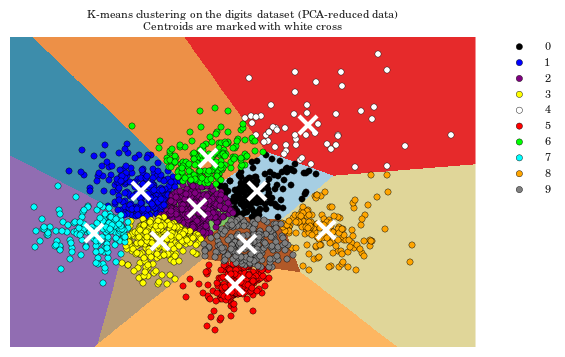

In [126]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

#plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
for i in range(len(colors)):
    x = reduced_data[:, 0][digits.target == i]
    y = reduced_data[:, 1][digits.target == i]
    
    x = reduced_data[:, 0][kmeans.labels_ == i]
    y = reduced_data[:, 1][kmeans.labels_ == i]
    plt.scatter(x, y, c=colors[i])
    
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)


colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']


plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(())
plt.yticks(())
plt.show()

In [118]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [112]:
len(kmeans.labels_)

1797

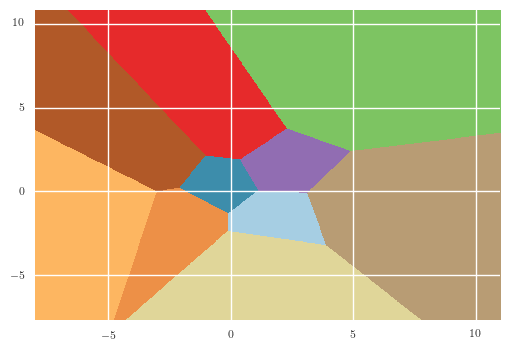

In [90]:
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

In [85]:
import matplotlib.colors as mcol
from matplotlib.colors import *
levels = np.arange(0, 4100, 100)
lvTmp = np.linspace(0.1,1.0,len(levels)-1)
cmTmp = plt.cm.Paired(lvTmp)
newCmap = mcol.ListedColormap(cmTmp)

In [92]:
newCmap.get_array()

AttributeError: 'ListedColormap' object has no attribute 'get_array'

In [46]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

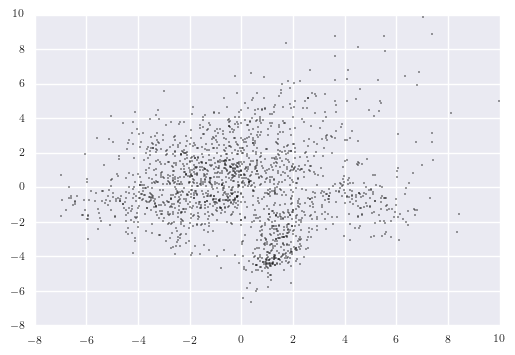

In [37]:
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

In [23]:
len(kmeans.labels_)

1797

In [16]:
kmeans.cluster_centers_

array([[-1.87631661, -1.37333096],
       [ 2.08822354,  1.63060143],
       [ 0.07843149,  3.60517072],
       [ 1.20274957, -3.95522741],
       [-4.56251438, -0.83999377],
       [-2.68645578,  1.68778837],
       [ 1.693534  , -1.51461466],
       [-0.39351821,  0.61733567],
       [ 4.16882703,  5.5971067 ],
       [ 4.91574754, -0.68578338]])

In [65]:
import numpy as np
 
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu
 
def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))
 
def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

In [66]:
import random
 
def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X